<a href="https://colab.research.google.com/github/JonathanLooman/Financial-Analysis-for-algorithmic-trading/blob/master/Autoregressive_moving_average.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Autoregressive moving average
This tutorial was completed as part of Udacities AI for trading Nanodegree.

In [0]:
# Import packages
import pandas as pd
import numpy as np
import os
from statsmodels.tsa.arima_model import ARMA
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
sns.set()
#note that for the figure size to show, this cell should be run
#separately from the import of pyplot
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (14, 8)

## Simulate return series with autoregressive properties

In [5]:
np.array([1,-0.5])

array([ 1. , -0.5])

In [0]:
from statsmodels.tsa.arima_process import ArmaProcess
np.random.seed(200)

ar_params = np.array([1, -0.5])
ma_params = np.array([1, -0.3])
ret = ArmaProcess(ar_params, ma_params).generate_sample(nsample=5*252)

ret = pd.Series(ret)
drift = 100
price = pd.Series(np.cumsum(ret))+drift

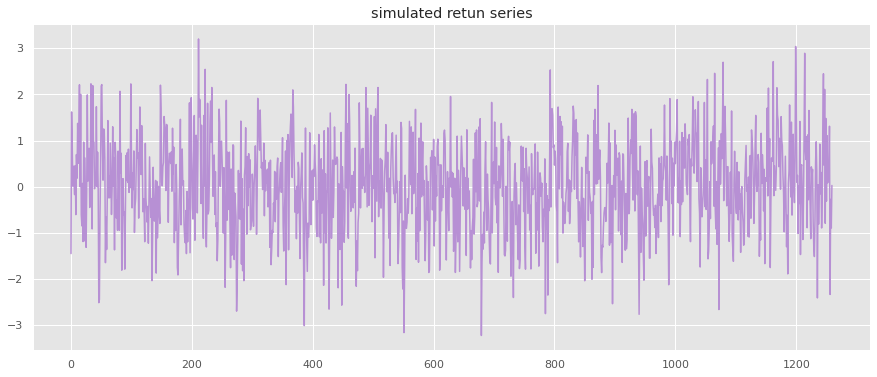

In [7]:
ret.plot(figsize = (15,6), color=sns.xkcd_rgb["pale purple"], title="simulated retun series")
plt.show()

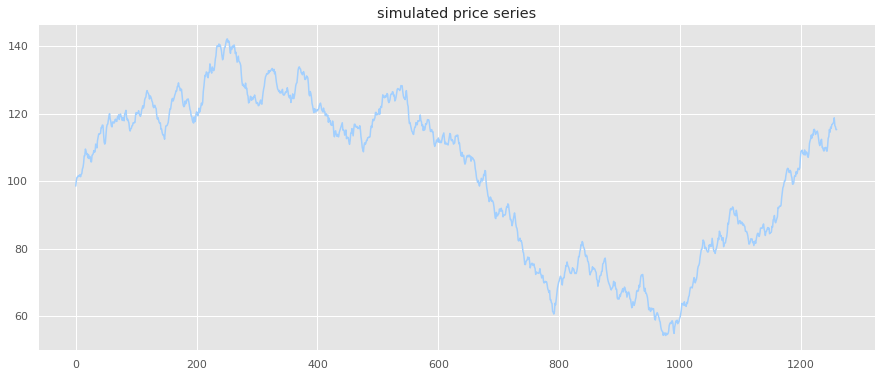

In [8]:
price.plot(figsize=(15,6), color=sns.xkcd_rgb['baby blue'], title='simulated price series')
plt.show()

### Log returns

In [0]:
lret = np.log(price)-np.log(price.shift(1))
lret = lret[1:]

In [16]:
lret

1       0.016312
2       0.009429
3       0.000130
4       0.004365
5       0.000785
          ...   
1255    0.011101
1256   -0.019872
1257   -0.002370
1258   -0.007744
1259    0.000230
Length: 1259, dtype: float64

## Autocorrelation
Use autocorrelation t get a sense of what lag t use fr the autoregressive model.

In [0]:
from statsmodels.graphics.tsaplots import plot_acf

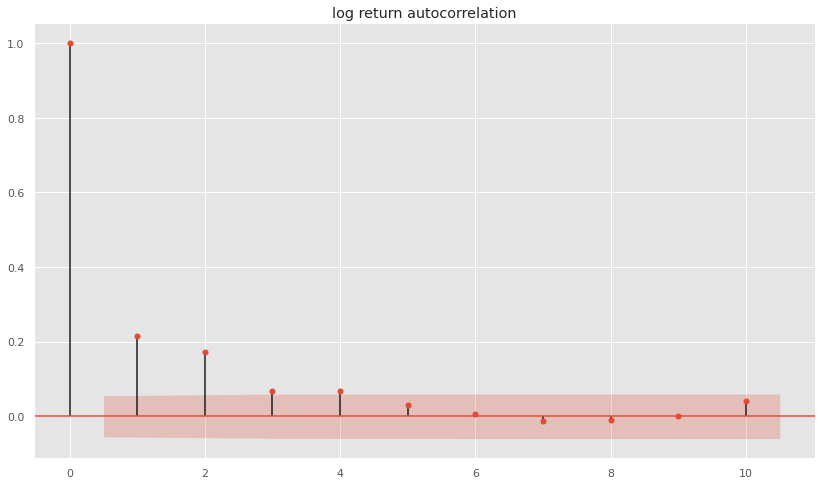

In [25]:
plot_acf(lret, lags=10, title='log return autocorrelation')
plt.show()

Since the sample series awas simulated ot have autoregressive properties, we also see autocorrelation between current periods and the lags.

Note that the actual stock data, there won't be much autocorrelation of returns form the one day to the next. Stock returns (log returns and normal returns can be desrcribed ans a random walk, in that each new period's value is more or less random.

## PLot partial autocorrelation

In [0]:
from statsmodels.graphics.tsaplots import plot_pacf

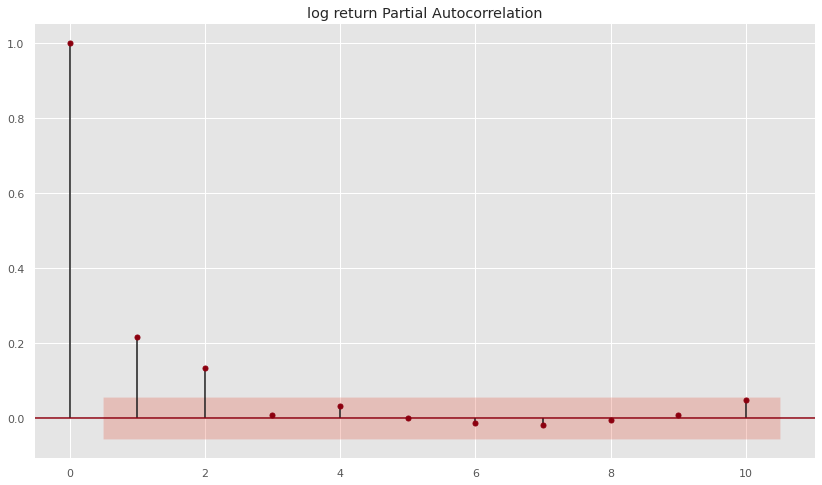

In [24]:
plot_pacf(lret, lags=10, title='log return Partial Autocorrelation', color=sns.xkcd_rgb["crimson"])
plt.show()

## Discussion
Notice that there isn't much corelation between previous periods with the current period. Difficulty in predicting stock from previous returns. Volitility tends to have more of a correlation with past volatility.

### Ljung-Box Test
The Ljung-Box Test helps chekc whether the lag we chose gives autocorrelations that are significantly different from zero. The null hypothesis is that the previous lags as a while are not correlated with the current period. The alternative hypothesis is naturally that the previous lags are correlated with the current period
```
returns:
lbvalue (float or array) – test statistic
pvalue (float or array) – p-value based on chi-square distribution
```

In [0]:
from statsmodels.stats.diagnostic import acorr_ljungbox

In [29]:
lb_test_stat, lb_p_value = acorr_ljungbox(lret, lags=20)
lb_p_value

array([2.01640711e-14, 1.24123312e-21, 5.10501473e-22, 1.86446247e-22,
       6.13688232e-22, 2.96811370e-21, 1.18392407e-20, 4.64232373e-20,
       1.78935377e-19, 2.36770725e-19, 5.54712773e-19, 1.32980392e-18,
       3.72359442e-18, 5.86709112e-18, 1.72205886e-17, 4.22143078e-17,
       1.15704571e-16, 9.89290170e-17, 2.59299780e-16, 1.50593115e-16])

### Discussion
Since the series was simulated to have autoregressive properties, the Ljung-Box test shows p-values less than 0.05 for the 20 lag periods that we tested

## Fit an ARMA model
For the purpose of familiarizing ourselves with the ARMA model, we'll fit the model to our simulated return series

To keep it simple I will use one lag for both the autoregression and the moving average.
Check out the stats model ARMA documentation here:
https://www.statsmodels.org/dev/generated/statsmodels.tsa.arima_model.ARMA.html

In [0]:
from statsmodels.tsa.arima_model import ARMA

In [0]:
AR_lag_p=1
MA_lag_q=1
order = (AR_lag_p, MA_lag_q)
arma_model = ARMA(lret.values, order=order)
arma_result = arma_model.fit()
arma_pred = pd.Series(arma_result.fittedvalues)

## View fitted predictions against acutal values

Fitted AR parameter 0.65, MA parameter -0.45


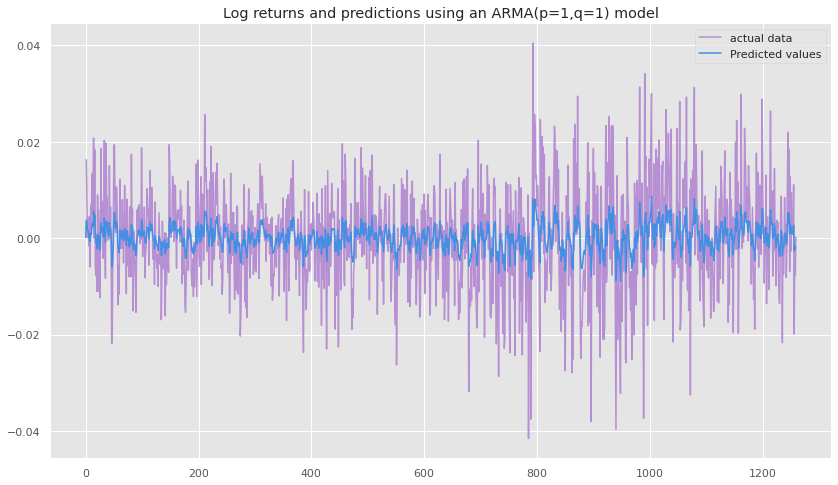

In [33]:
plt.plot(lret, color=sns.xkcd_rgb["pale purple"], label = 'actual data')
plt.plot(arma_pred, color=sns.xkcd_rgb["dark sky blue"], label = 'Predicted values')
plt.title('Log returns and predictions using an ARMA(p=1,q=1) model');
plt.legend()
print(f"Fitted AR parameter {arma_result.arparams[0]:.2f}, MA parameter {arma_result.maparams[0]:.2f}")

### Discussion
As can be seen by the graph above, ARMA does not accurately predict the stock price as the stock returns are non-stationary and low signal to noise ratio.

Other models which build apon the concepts of ARMA have been shown to be more accurate.

In [0]:
from statsmodels.tsa.arima_model import ARIMA

In [0]:
def fit_arima(lret, AR_lag_p=1,MA_lag_q =1, order_of_integration_d =1 ):
    
    
    #TODO: Create a tuple of p,d,q
    order =  (AR_lag_p,order_of_integration_d,MA_lag_q)
    
    #TODO: create an ARIMA model object, passing in the values of the lret pandas series,
    # and the tuple containing the (p,d,q) order arguments
    
    arima_model = ARMA(lret.values, order=order)
    arima_result = arima_model.fit()
    
    #TODO: from the result of calling ARIMA.fit(),
    # save and return the fitted values, autoregression parameters, and moving average parameters
    fittedvalues = pd.Series(arma_result.fittedvalues)
    arparams = arma_result.arparams
    maparams = arma_result.maparams
    
    return fittedvalues,arparams,maparams



fitted AR parameter 0.65, MA parameter -0.45


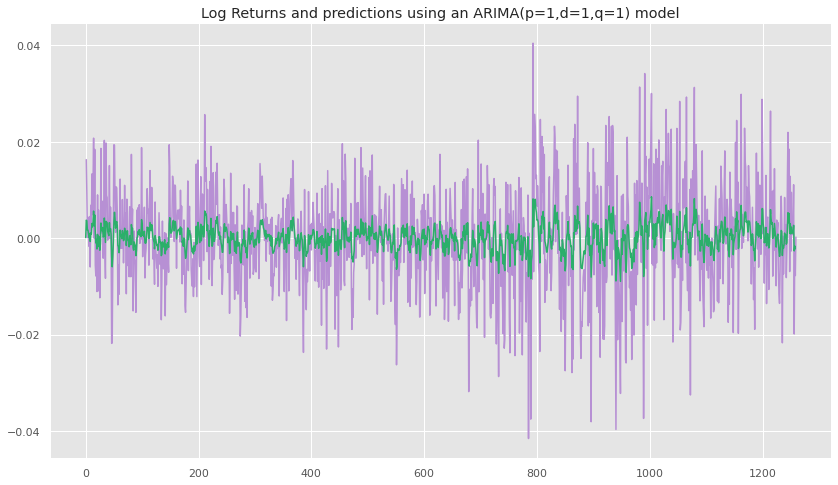

In [42]:
fittedvalues,arparams,maparams = fit_arima(lret)
arima_pred = pd.Series(fittedvalues)
plt.plot(lret, color=sns.xkcd_rgb["pale purple"])
plt.plot(arima_pred, color=sns.xkcd_rgb["jade green"])
plt.title('Log Returns and predictions using an ARIMA(p=1,d=1,q=1) model');
print(f"fitted AR parameter {arparams[0]:.2f}, MA parameter {maparams[0]:.2f}")

Other models which I will look at later include:
- Kalman Filters
- Particle filters (Kalman filters in a genetic algorithm framework)
- Recurrent Neural networks
-Long Short term Memory Cells